In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\NareshIT\DataScience\DataFiles\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [3]:
cat = visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
num = visa_df.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Bi-Variate analysis**

- Analyse the two variables
- it may be two categorical columns
- or two numerical columns
- one categorical and one numerical columns

**Categorical vs categoricals**

$Continent$-$Case-status$

In [5]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

##### How many asian people got visa certified?
##### how many asiam people got visa denied?

In [7]:
cond1 = visa_df['continent'] == 'Asia'
cond2 = visa_df['case_status'] == 'Certified'
l =len(visa_df[cond1 & cond2])
print(f"the no. of employees from asia continent whose visa got certifies is {l}")

the no. of employees from asia continent whose visa got certifies is 11012


In [8]:
cond1 = visa_df['continent'] == 'Asia'
cond2 = visa_df['case_status'] == 'Denied'
l =len(visa_df[cond1 & cond2])
print(f"the no. of employees from asia continent whose visa got Denied is {l}")

the no. of employees from asia continent whose visa got Denied is 5849


In [9]:
conti = visa_df['continent'].value_counts().index
cert = []
den = []
for i in conti:
    c1 = visa_df['continent'] == i
    c2 = visa_df['case_status'] == 'Certified'
    c3 = visa_df['case_status'] == 'Denied'
    cert.append(len(visa_df[c1 & c2]))
    den.append(len(visa_df[c1 & c3]))

cert,den

([11012, 2957, 2037, 493, 397, 122], [5849, 775, 1255, 359, 154, 70])

In [10]:
keys = visa_df['continent'].unique()
cert = []
den = []
for i in keys:
    cert.append(len(visa_df[(visa_df['continent'] == i) & (visa_df['case_status'] == 'Certified')]))
    den.append(len(visa_df[(visa_df['continent'] == i) & (visa_df['case_status'] == 'Denied')]))

#pd.DataFrame(data = [cert, den], index=['certified', 'denied'], columns=conti).T
pd.DataFrame(zip(cert, den),index=keys, columns=('certified', 'denied'))

,certified,denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- it will take 2 arguments
- 1st argument isnindex
- 2nd is column

In [11]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
res1 = pd.crosstab(col1, col2)
res1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

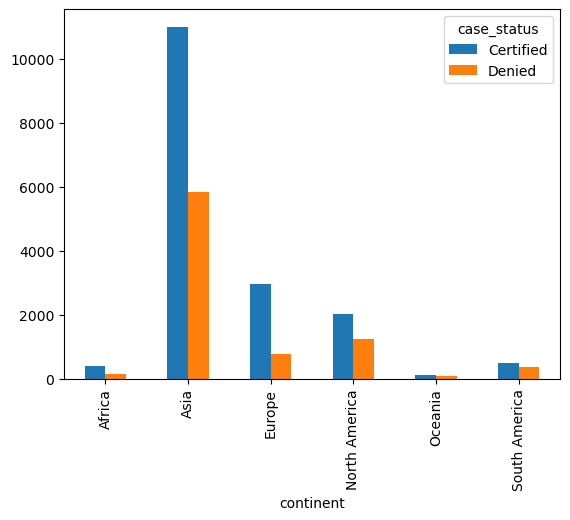

In [12]:
res1.plot(kind = 'bar')

In [13]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
res2 = pd.crosstab(col2, col1)
res2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='case_status'>

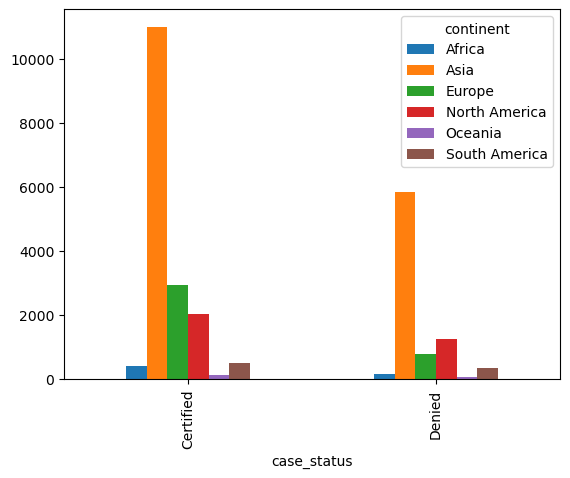

In [14]:
res2.plot(kind = 'bar')

**with 3 columns**

In [15]:
col1 = visa_df['continent']
col2 = visa_df['education_of_employee']
col3 = visa_df['case_status']
col = [col1,col2]
res3 = pd.crosstab(col, col3)
res3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

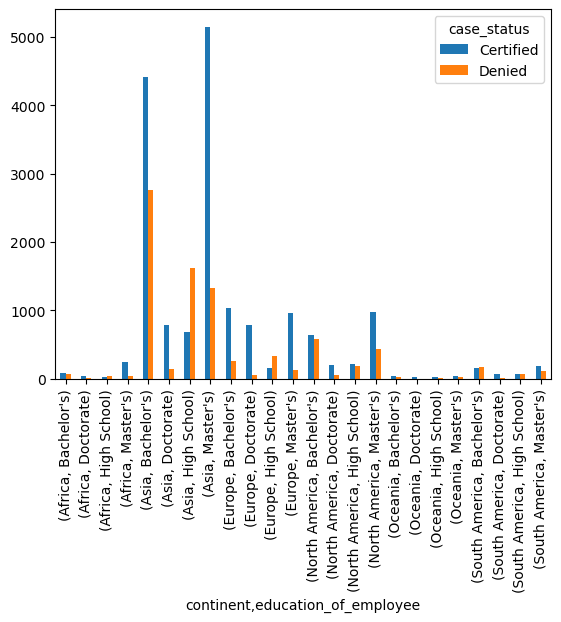

In [16]:
res3.plot(kind = 'bar')

In [17]:
col1 = visa_df['continent']
col2 = visa_df['education_of_employee']
col3 = visa_df['case_status']
col = [col2,col3]
res4 = pd.crosstab(col1, col)
res4

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent,education_of_employee'>

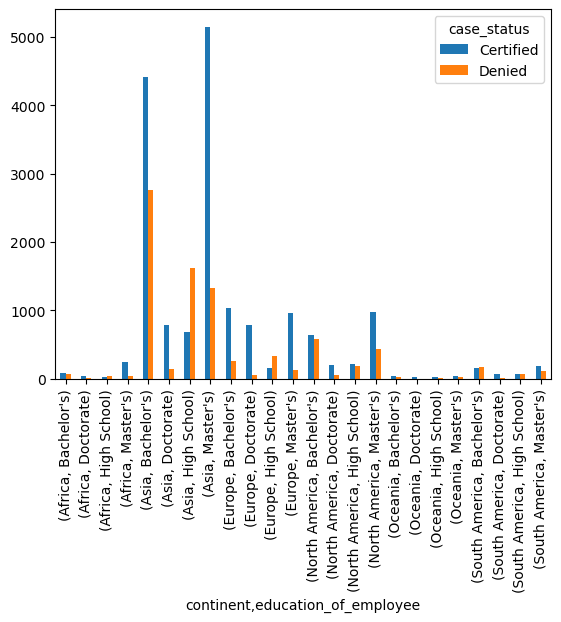

In [18]:
res3.plot(kind = 'bar')

In [19]:
col1 = visa_df['continent']
col2 = visa_df['education_of_employee']
col3 = visa_df['case_status']
#col = [col2,col3]
res5 = pd.crosstab(col1, [col2,col3])
res5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

**Numerical-Numerical**

- In order to plot numerical vs numerical we need to use scatter plots

- scatter plots will gives the relation between two numerical columns

- it is under matplotlib

$plt.scatter$

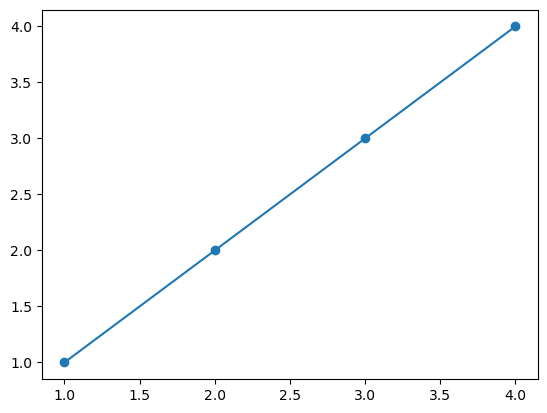

In [20]:
x = [1,2,3,4]
y = [1,2,3,4]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y) #to get line

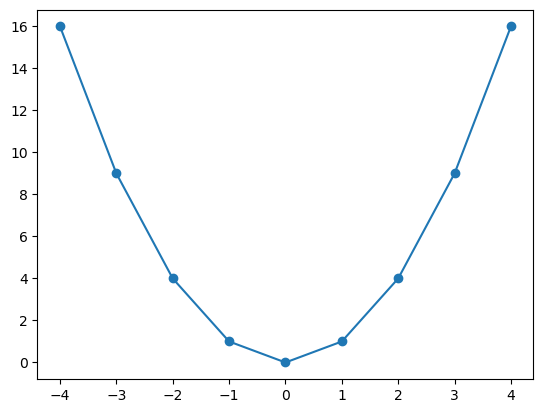

In [21]:
x = [i for i in range(-4,5)]
y = [i**2 for i in x]
# it is y=x*x plot
plt.scatter(x,y)
plt.plot(x,y) #to get line

In [22]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Scatter-1**
- 'no_of_employees' vs 'yr_of_estab'

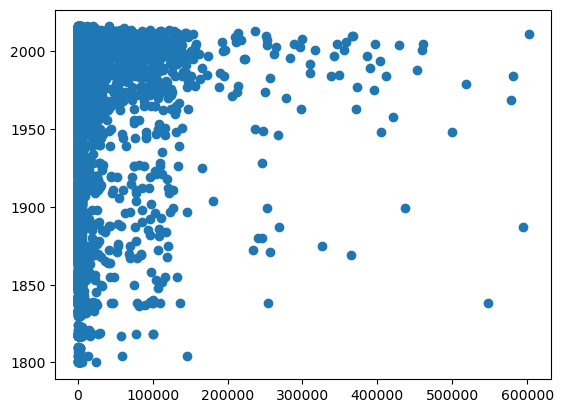

In [23]:
col1 = visa_df['no_of_employees']
col2 = visa_df['yr_of_estab']
plt.scatter(col1,col2)

**Observation** : No relation

**Scatter-2**
- 'no_of_employees' vs 'prevailing_wage'

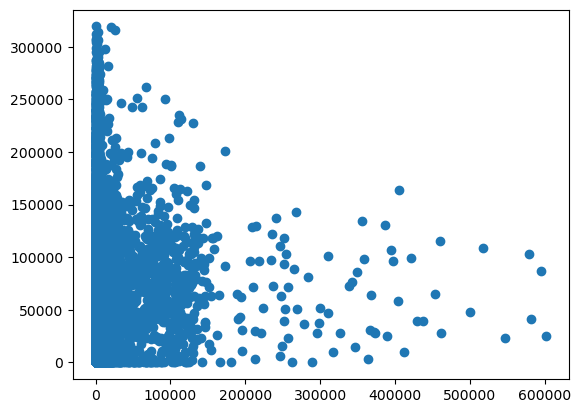

In [24]:
col1 = visa_df['no_of_employees']
col2 = visa_df['prevailing_wage']
plt.scatter(col1,col2)

**Observation** : No relation

**Scatter-3**
- 'prevailing_wage' vs 'yr_of_estab'

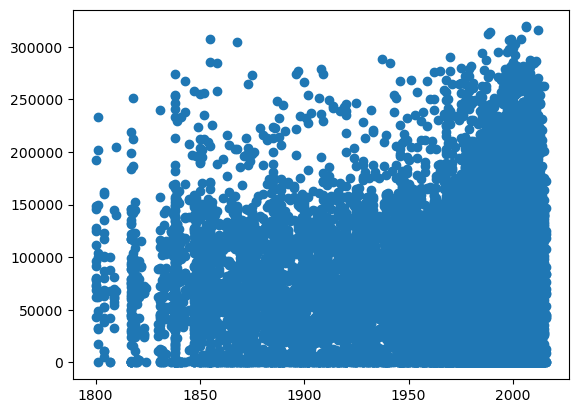

In [25]:
col2 = visa_df['prevailing_wage']
col1 = visa_df['yr_of_estab']
plt.scatter(col1,col2)

**Observation** : No relation

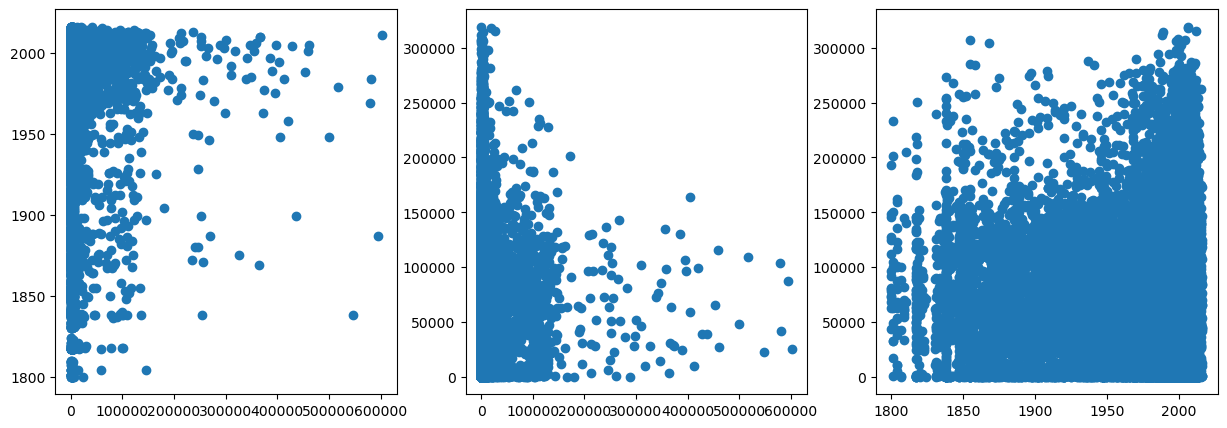

In [26]:
plt.figure(figsize=(15,5))

col1 = visa_df['no_of_employees']
col2 = visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)

col1 = visa_df['no_of_employees']
col2 = visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col2 = visa_df['prevailing_wage']
col1 = visa_df['yr_of_estab']
plt.subplot(1,3,3).scatter(col1,col2)

**Pearson coorelation coefficient**

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="24" data-atf="0">

- Pearson correrlation coefficient will give the amount of relation between variales

- It is denoted by r

- r varies from -1 to 1

- for positive relation r varies from 0 to 1

- for negative relation r varies from -1 to 0

- for no relation r approxiamate to 0

- In python we have **corr** function under pandas

   - Ths will give covariance mtraix

   - we already discussed covariance matrix is rows and columns type
     
   - In this data we have 3 numerical columns
 
   - so we will get 383 = 9 values
 
   - All traces of the matrix represents **variance**
 
   - Upper triangle and lower triangle represens **co-variance**

In [27]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observation**

- the relation between no_of_employees and yr_of_estab is 0 that is there is no relation between them

- the relation between no_of_employees and prevailing_wage is 0 that is there is no relation between them

- the relation between yr_of_estab and prevailing_wage is 0 that is there is no relation between them

**What happens if correlation is high**

- for that we will read wine quality dataset

- we will perform corr

In [28]:
wine_df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\NareshIT\DataScience\DataFiles\winequality_red.csv")
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wine_data = wine_df.drop_duplicates()
wine_data = wine_data.iloc[1:,:]
wine_data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1355,3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1356,3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1357,3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [30]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
len(wine_data.columns)

12

In [32]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**Heat Map**

- heat map will provide the matrix representation of correlation value

- heat map represents values in color formate

- different values in differen colors

- beside matric it will display color bar

- color bar is like a scale of values with color

- it is under seaborn package

<Axes: >

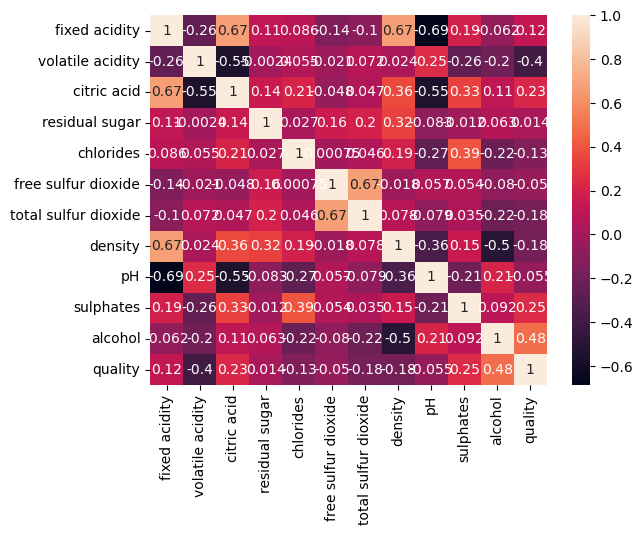

In [33]:
wine_corr = wine_data.corr()
sns.heatmap(wine_corr, annot=True)

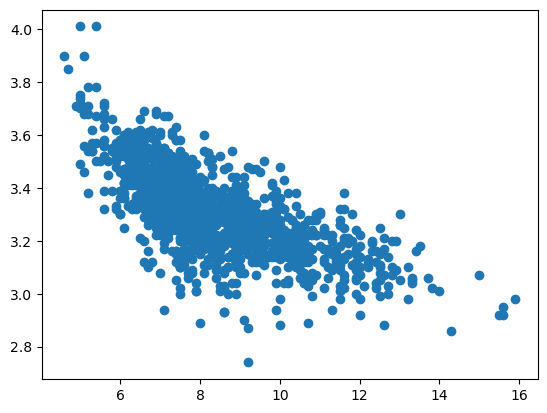

In [42]:
# negative correlation

col1 = wine_data['fixed acidity']
col2 = wine_data['pH']
plt.scatter(col1, col2)

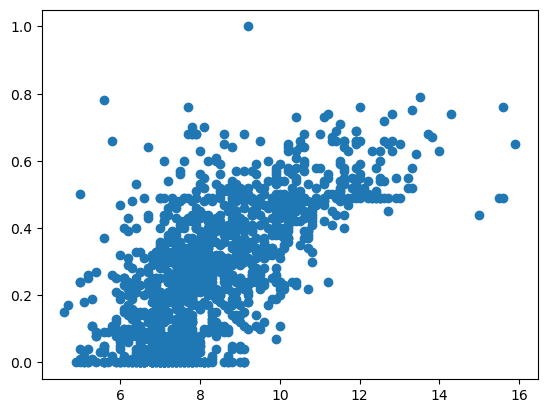

In [43]:
# positive coorelation

col1 = wine_data['fixed acidity']
col2 = wine_data['citric acid']
plt.scatter(col1, col2)

In [34]:
sns.__version__

'0.13.2'

<Axes: >

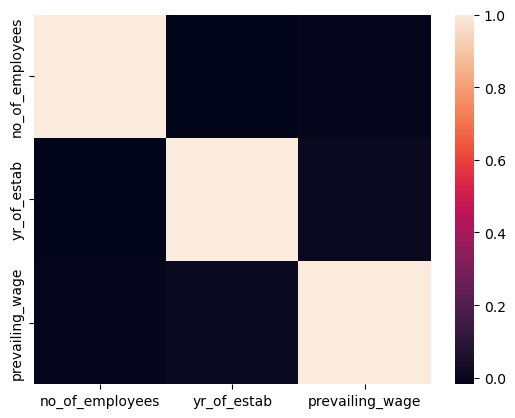

In [40]:
num = visa_df.select_dtypes(exclude='object')
visa_corr = num.corr()
sns.heatmap(visa_corr)

<Axes: >

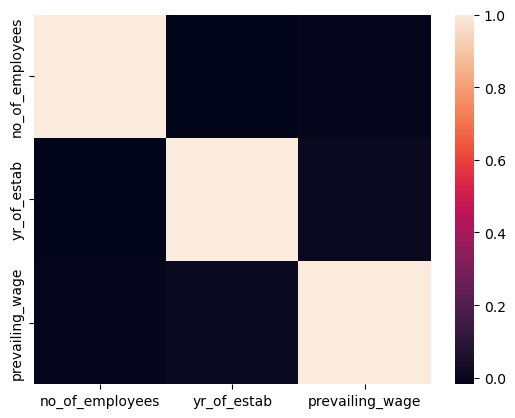

In [39]:
visa_corr = num.corr(numeric_only=True)
sns.heatmap(visa_corr)